In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv")
cal_fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42797 entries, 0 to 42796
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42797 non-null  object 
 1   * Roof Construction                          42797 non-null  object 
 2   * Eaves                                      42797 non-null  object 
 3   * Vent Screen                                42797 non-null  object 
 4   * Exterior Siding                            42797 non-null  object 
 5   * Window Pane                                42797 non-null  object 
 6   * Deck/Porch On Grade                        42797 non-null  object 
 7   * Deck/Porch Elevated                        42797 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42797 non-null  object 
 9   * Fence Attached to Structure                42797 non-null  object 
 10

In [70]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216, stratify=cal_fire_data['Destroyed'])
fire_train['Destroyed'].value_counts(normalize=True)


Destroyed
0    0.597716
1    0.402284
Name: proportion, dtype: float64

In [71]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score

In [72]:
baseline_accs = np.zeros(5)
baseline_balanced_accs = np.zeros(5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=216)
i=0
for train_index, test_index in kfold.split(fire_train, fire_train.Destroyed):
    fire_tt = fire_train.iloc[train_index]
    fire_ho = fire_train.iloc[test_index]

    baseline_clf = DummyClassifier(strategy='most_frequent')
    baseline_clf.fit(fire_tt, fire_tt.Destroyed)
    pred = baseline_clf.predict(fire_ho)
    baseline_accs[i] = accuracy_score(fire_ho.Destroyed, pred)
    baseline_balanced_accs[i] = balanced_accuracy_score(fire_ho.Destroyed, pred)
    print(baseline_accs[i])
    print(baseline_balanced_accs[i])
    i = i + 1
print(np.mean(baseline_accs))
print(np.mean(baseline_balanced_accs))

0.5976927570093458
0.5
0.5976927570093458
0.5
0.597780049656784
0.5
0.597780049656784
0.5
0.5976340002920987
0.5
0.5977159227248716
0.5


In [73]:
test_pred = baseline_clf.predict(fire_test)
baseline_test_acc = accuracy_score(fire_test.Destroyed, test_pred)
baseline_test_balanced_acc = balanced_accuracy_score(fire_test.Destroyed, test_pred)
print(baseline_test_acc)
print(baseline_test_balanced_acc)

0.5976635514018691
0.5


In [74]:
probabilities = baseline_clf.predict_proba(fire_test)
print(probabilities)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [76]:
print(precision_score(fire_test.Destroyed, baseline_clf.predict(fire_test), average=None))
print(recall_score(fire_test.Destroyed, baseline_clf.predict(fire_test), average=None))

[0.59766355 0.        ]
[1. 0.]


/usr/local/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

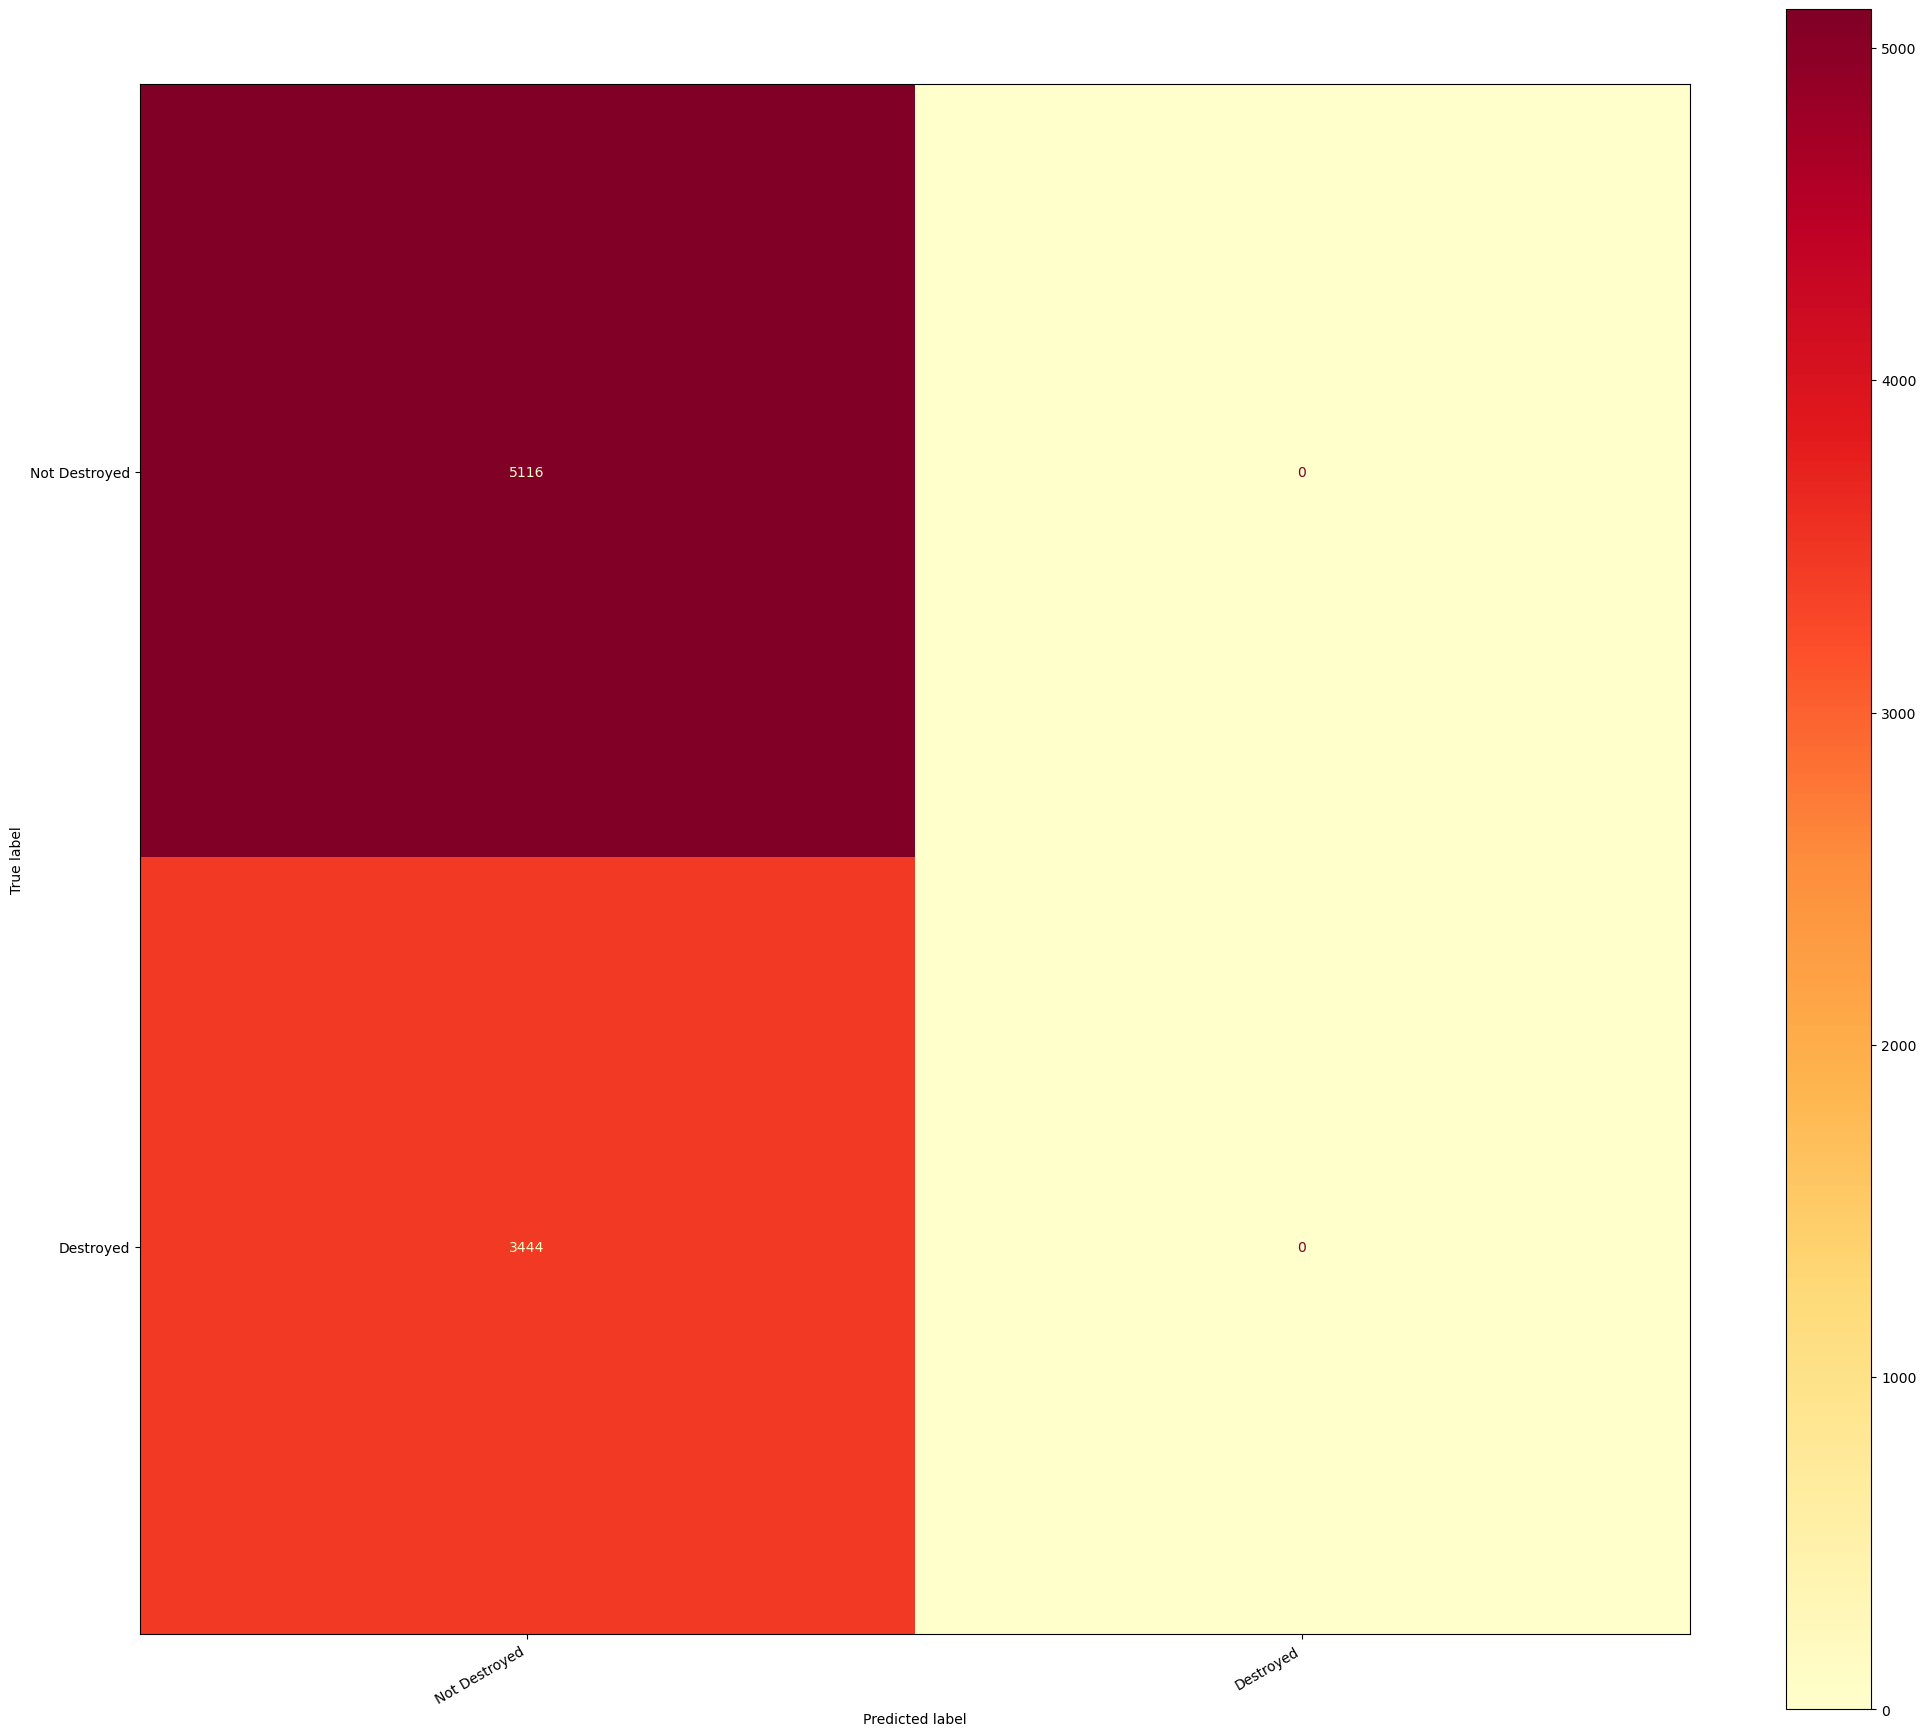

In [79]:
cm = confusion_matrix(fire_test.Destroyed, baseline_clf.predict(fire_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(25, 25))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.show()